In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing

<IPython.core.display.Javascript object>


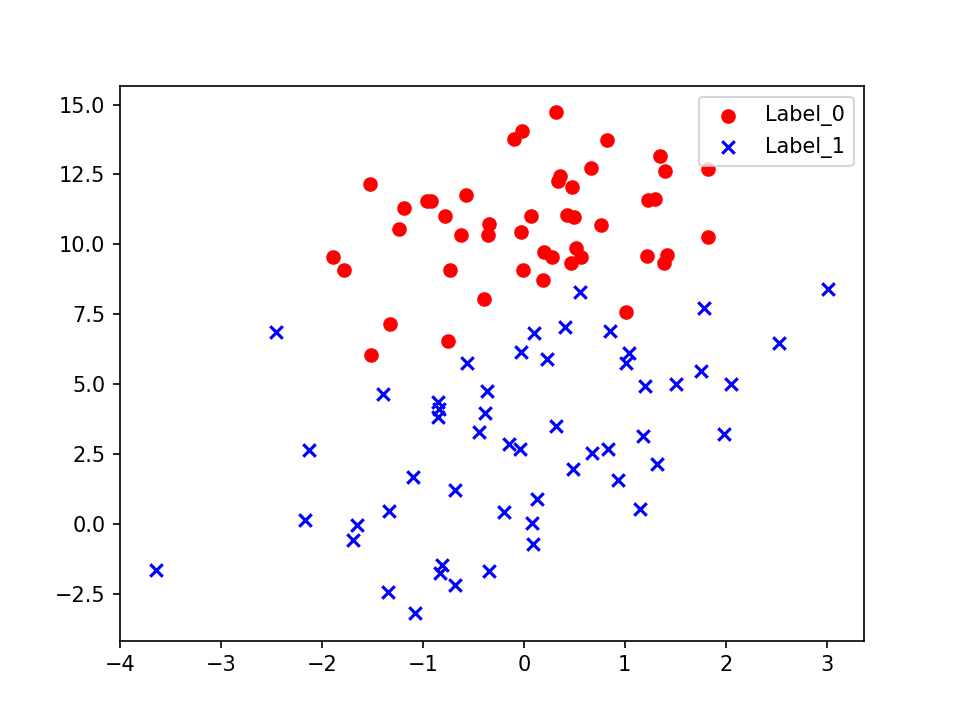

In [2]:
# import the dataSet
data = np.genfromtxt("Sample.csv", delimiter=",")

# divide the features and the target variables
x_data = data[:,:-1]
y_data = data[:,-1]

# plot the scatter of each labels
plt.scatter(x_data[y_data == 0,0], x_data[y_data == 0, 1], label = 'Label_0', color = 'red', marker = 'o')
plt.scatter(x_data[y_data == 1,0], x_data[y_data == 1, 1], label = 'Label_1', color = 'b', marker = 'x')
plt.legend(loc = 'best')

In [3]:
# transform the y into the row * 1, 2 dimensions
x_data = data[:,:-1]
y__data = data[:,-1,np.newaxis]

# scale the x_data to increase the accuracy and the speed of iteration
X_data = preprocessing.scale(x_data)

# add the contant feature of 1 into the data_set, and this step should be after the scale
X_data = np.concatenate((np.ones((len(X_data),1)),X_data),axis=1)

In [4]:
# define the sigmoid function
def sigmoid(x):
    return 1.0/(1 + np.exp(-x))

# define the cost funtion
def cost(xMat, yMat, Ws):
    # the cost consists of two parts, y = 1 and y = 0 respectively.
    left = np.multiply(yMat, np.log(sigmoid(xMat * Ws)))
    right = np.multiply(1 - yMat, np.log(1 - sigmoid(xMat * Ws)))
    return np.sum(left + right) / - len(xMat)

# define the gradient ascent to adjust the weights
def grad_ascent(xArr, yArr, lr = 0.001, epochs = 10000):
    '''
    input:
        xArr: the features
        yArr: the target variables, 0 or 1
        lr: learning rate
        epochs: the max number of iterations
    
    return:
        the weights
    
    '''
    
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    
    # define a list to store the cost for every 50 iterations
    costList = []
    # get the number of the rows and cols
    row, col = np.shape(xMat)
    # initialize the weights of 1, col * 1
    Ws = np.mat(np.ones((col, 1)))
    
    for i in range(epochs + 1):
        # calculate the y: row * 1
        h = sigmoid(xMat * Ws)
        # calculate the gradients
        Ws_grad = xMat.T * (h - yMat) / row
        # update the weights
        Ws = Ws - lr * Ws_grad
        
        # record the cost in every 50 iterations
        if i % 50 == 0:
            costList.append(cost(xMat, yMat, Ws))
    
    # return the weighs after iteration
    return Ws, costList

In [5]:
# fit the model, and get the weights and the costList
ws,costList = grad_ascent(X_data, y__data)
print(ws)

[[ 0.30456397]
 [ 0.30744264]
 [-1.79718025]]


<IPython.core.display.Javascript object>


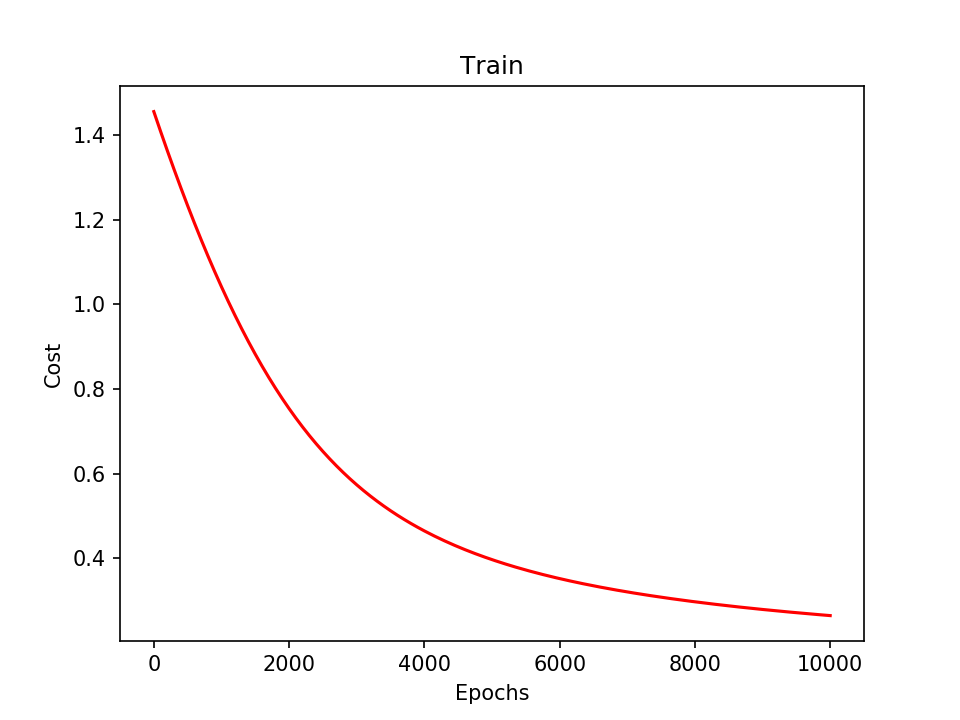

In [6]:
# plot the loss value 
x = np.linspace(0,10000,201)
plt.plot(x, costList, c='r')
plt.title('Train')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

In [7]:
# predict the y value
def predict(x_data, Ws):
    
    x_data = preprocessing.scale(x_data)
    xMat = np.mat(x_data)
    ws = np.mat(Ws)
    return [1 if x >= 0.5 else 0 for x in sigmoid(xMat * Ws)]

predictions = predict(X_data, ws)

print(classification_report(y_data, predictions))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        47
         1.0       1.00      0.92      0.96        53

   micro avg       0.96      0.96      0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100

